In [1]:
from transformers import BartForConditionalGeneration, AutoTokenizer
from datasets import load_dataset
import torch
from rebel import from_text_to_kb
import networkx as nx

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# example using govreport
modelname = "abertsch/unlimiformer-bart-govreport-alternating"
dataset = load_dataset("urialon/gov_report_validation")

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-base")
model = BartForConditionalGeneration.from_pretrained(modelname)

example_input = dataset['validation'][0]['input']
# example_input = open('harry_potter_full.txt','r').read()
# print(example_input)


kb = from_text_to_kb(example_input, verbose=True)
print("________________________________________________")
kb.print()
relations = kb.get_relations()

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Token indices sequence length is longer than the specified maximum sequence length for this model (5666 > 1024). Running this sequence through the model will result in indexing errors


Input has 5666 tokens
Input has 45 spans
Span boundaries are [[0, 128], [125, 253], [250, 378], [375, 503], [500, 628], [625, 753], [750, 878], [875, 1003], [1000, 1128], [1125, 1253], [1250, 1378], [1375, 1503], [1500, 1628], [1625, 1753], [1750, 1878], [1875, 2003], [2000, 2128], [2125, 2253], [2250, 2378], [2375, 2503], [2500, 2628], [2625, 2753], [2750, 2878], [2875, 3003], [3000, 3128], [3125, 3253], [3250, 3378], [3375, 3503], [3500, 3628], [3625, 3753], [3750, 3878], [3875, 4003], [4000, 4128], [4125, 4253], [4250, 4378], [4375, 4503], [4500, 4628], [4625, 4753], [4750, 4878], [4875, 5003], [5000, 5128], [5125, 5253], [5250, 5378], [5375, 5503], [5500, 5628]]
________________________________________________
Relations:
Special operations : subclass of : military operations
Special operations : subclass of : military operation
Special Operations Forces : use : Special operations
USSOCOM : headquarters location : MacDill Air Force Base
MacDill Air Force Base : located in the admini

In [ ]:
G = nx.DiGraph()

# Add nodes and edges to the graph
for pair in relations:
    head = pair['head']
    tail = pair['tail']
    relation = pair['type']
    metadata = pair['meta']
    
    # Add nodes
    if head not in G:
        G.add_node(head)
    if tail not in G:
        G.add_node(tail)
    
    # Add edge with metadata
    G.add_edge(head, tail, type=relation, meta=metadata)


In [ ]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
average_in_degree = sum(dict(G.in_degree()).values()) / float(G.number_of_nodes())
average_out_degree = sum(dict(G.out_degree()).values()) / float(G.number_of_nodes())

average_in_degree, average_out_degree

Total number of nodes: 135
Total number of edges: 123


(0.9111111111111111, 0.9111111111111111)

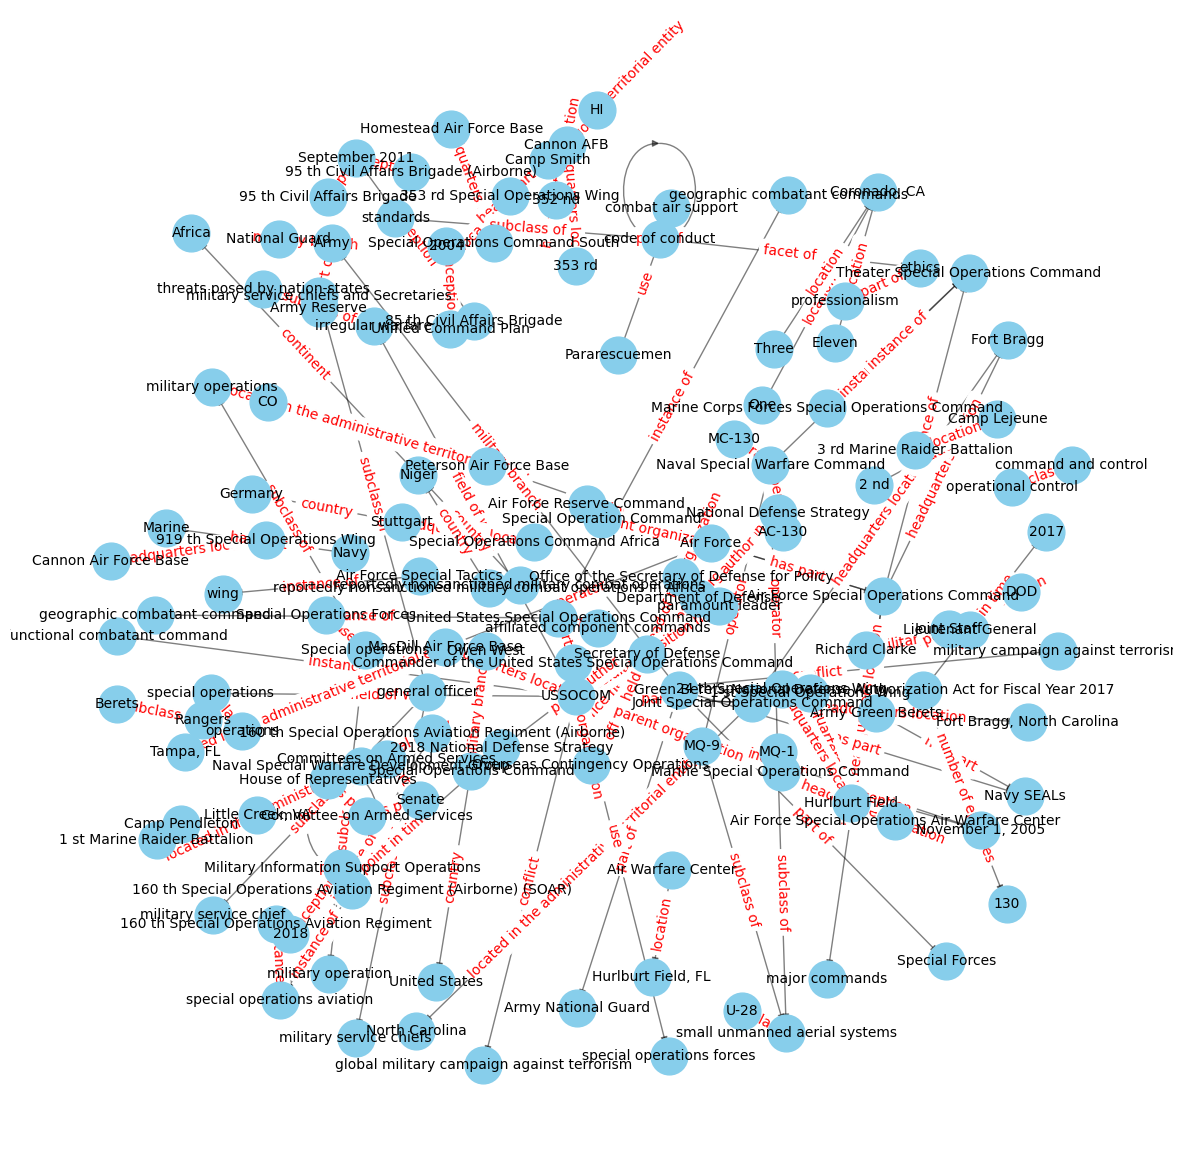

In [ ]:
import matplotlib.pyplot as plt

# Increase the size of the plot
plt.figure(figsize=(15, 15))

# Specify the layout for graph - for example, the spring layout
pos = nx.spring_layout(G, k=0.1, iterations=20)

# Draw the nodes 
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue')

# Draw the edges 
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)

# Draw node labels 
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Draw edge labels with a specific font size and color
edge_labels = nx.get_edge_attributes(G, 'type')  # Assuming 'type' is an attribute of edges
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')


plt.axis('off')

plt.show()